<a href="https://colab.research.google.com/github/cddogaru/Inteligencia-Artificial---Aprendizaje-No-Supervisado/blob/main/Aprendizaje_No_Supervisado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aprendizaje No-Supervisado

Recordemos que el proposito del aprendizaje automatico superviado es predecir la realidad. El aprendizaje no supervisado tiene como proposito clasificar la realidad y generar predicciones sobre esta clasificacion. El aprendizaje no supervisado clasifica por similaridad.

La principal ventaja del aprendizaje no supervisado es que no se necesitan series de datos etiquetadas para proceder a la clasificacion.

La gran mayoria de modelos de aprendizaje no supervisado utilizan tecnicas de agrupacion por similaridad (distancia) entre parametros.

Vamos a necesitar los siguientes modulos:

In [1]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%matplotlib inline

Generamos un grupo de puntos utilizando la funcion make_blobs:

In [2]:
puntos, idx_grupos = make_blobs(n_samples=300,
                                centers=4,
                                cluster_std=0.8,
                                random_state=0)

In [3]:
idx_grupos[20]

1

In [4]:
puntos

array([[ 0.43071995,  2.54925795],
       [-1.4687922 ,  7.26767764],
       [ 1.21486062,  5.36489604],
       [-0.94206983,  7.80806619],
       [ 1.01004604,  2.2241682 ],
       [ 3.89840088,  0.049651  ],
       [-1.90199536,  1.15672923],
       [ 1.55954253,  4.40697366],
       [ 0.14284237,  8.63097553],
       [-0.53204756,  8.93543127],
       [-1.77419557,  2.73110893],
       [-3.1439253 ,  8.52670186],
       [ 1.33136066,  4.57072679],
       [-2.5543634 ,  6.58124584],
       [ 1.25509524, -0.33815322],
       [ 0.27963236,  3.8407076 ],
       [ 1.10022802,  4.60631734],
       [ 2.74073201,  0.37684319],
       [-0.91357347,  3.20291652],
       [-0.92915335,  1.9667263 ],
       [ 2.9349952 ,  1.42187464],
       [ 1.68439074,  1.28284884],
       [ 0.65372852,  5.28174338],
       [-2.15300734,  2.82957082],
       [-2.04873889,  2.50093081],
       [-1.06612177,  4.8266822 ],
       [ 1.57821629,  0.85560982],
       [ 0.46759322,  4.84493396],
       [-3.3313554 ,

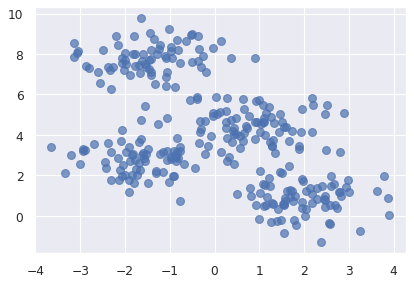

In [5]:
x = puntos[:, 0]
y = puntos[:, 1]

plt.figure(figsize=(6, 4), dpi=80)
plt.scatter(x, y, s=50, alpha=0.7);

Podemos ajustar estos puntos a un numero determinado de grupos:

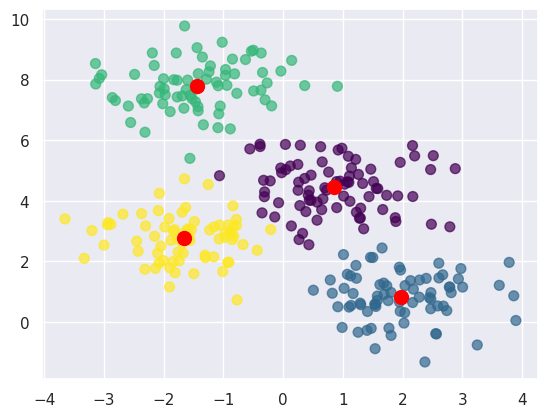

In [6]:
# https://scikit-learn.org/stable/modules/clustering.html#k-means
k_medias = KMeans(n_clusters=4, random_state=0)
k_medias.fit(puntos)
idx_prediccion = k_medias.predict(puntos)

plt.scatter(x, y, c=idx_prediccion, s=50, alpha=0.7, cmap='viridis')

centroides = k_medias.cluster_centers_
plt.scatter(centroides[:, 0], centroides[:, 1], c='red', s=100);

In [7]:
k_medias.predict(np.array([[-1.5, 4.4]]))

array([3], dtype=int32)

Este es el procedimiento del algoritmo:

![picture](https://drive.google.com/uc?export=view&id=1-05xoK1X6jPUlA-lRg-E2mSP7STLM-Me)

¿Puedes probar a agrupar estos puntos en otro numero de grupos: 2, 3, 5 y 15 grupos?¿Que efecto tiene en la posicion de los centroides?¿Cual es el numero correcto de grupos?

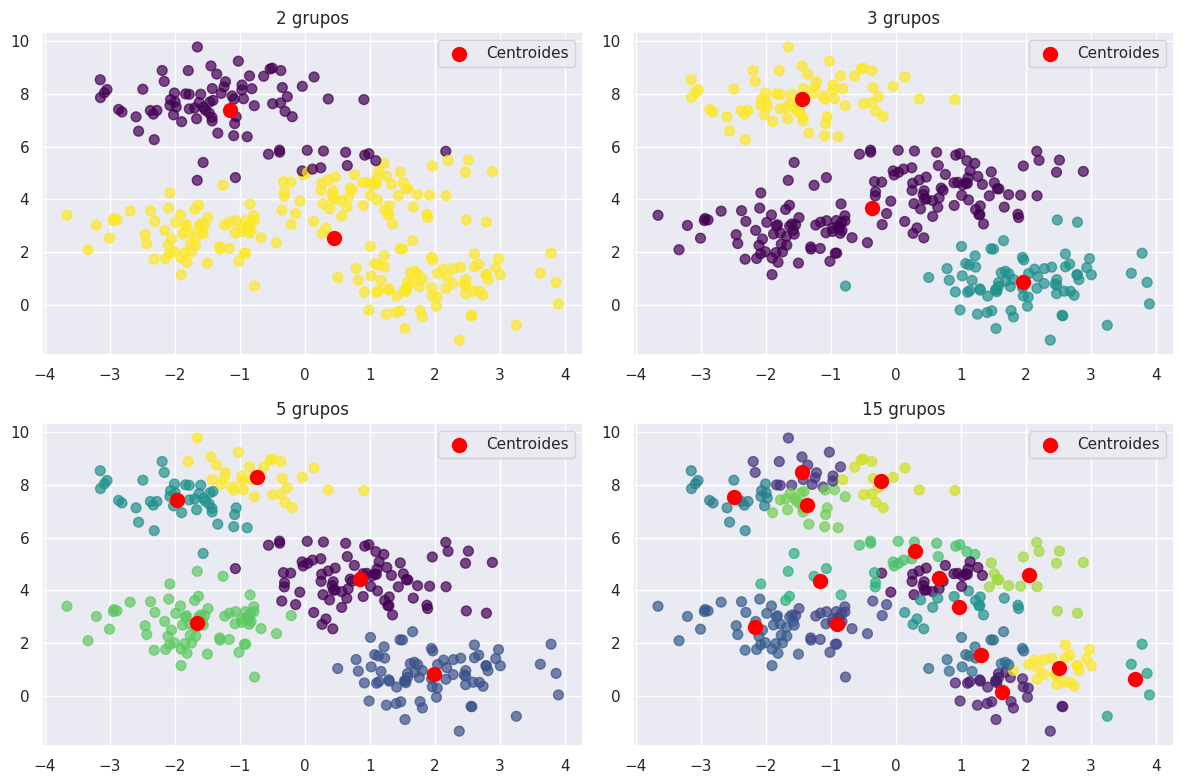

Centroides para 2 grupos:
[[-1.14751333  7.36821225]
 [ 0.44165019  2.52363807]]

Centroides para 3 grupos:
[[-0.37269409  3.68742579]
 [ 1.96036715  0.8944478 ]
 [-1.439055    7.81367705]]

Centroides para 5 grupos:
[[ 0.85491787  4.44098171]
 [ 1.97899828  0.83487115]
 [-1.96669792  7.41087024]
 [-1.65917487  2.7607673 ]
 [-0.72815528  8.28150785]]

Centroides para 15 grupos:
[[ 0.67015602  4.45376491]
 [ 1.63361501  0.17006325]
 [-1.43780025  8.49526592]
 [-0.90741225  2.73600736]
 [-2.16641577  2.60923261]
 [ 1.30829247  1.55507   ]
 [-2.47992047  7.53260517]
 [ 0.97920414  3.3878072 ]
 [ 3.68356487  0.66636178]
 [-1.15742926  4.36934157]
 [ 0.30192328  5.48326745]
 [-1.35844073  7.22982712]
 [ 2.05382393  4.60021115]
 [-0.22961676  8.13026139]
 [ 2.51546579  1.07773701]]



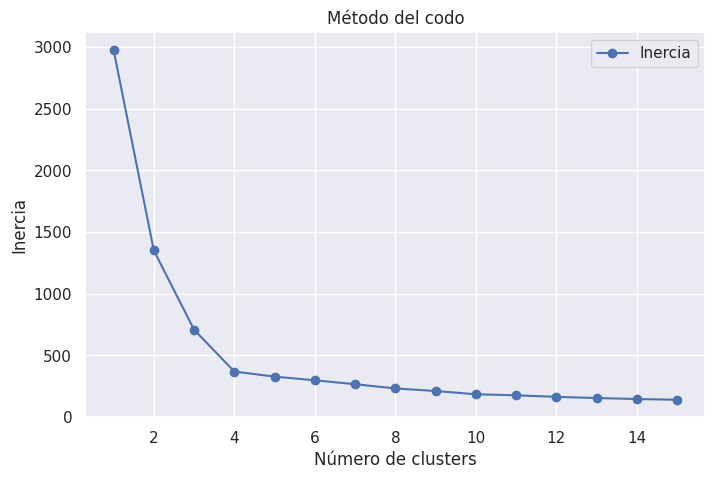

'\n\nEfecto en la posición de los centroides\n1. Con un número bajo de clusters (por ejemplo 2):\nLos centroides se posicionan en el centro de las dos grandes regiones que abarcan a los puntos. Esto puede agrupar diferentes clusters originales en un solo grupo grande.\nComo resultado, los centroides quedan lejos de algunos puntos que en realidad deberían formar clusters separados.\n2.Con un número correcto de clusters (en este caso 4):\nLos centroides se ubican de manera precisa en el centro de cada grupo generado. Cada cluster está bien representado, y la asignación de puntos a clusters es más adecuada.\nLos centroides reflejan fielmente la estructura de los datos originales.\n3. Con un número excesivo de clusters (por ejemplo 15):\nLos clusters se dividen en regiones pequeñas y locales. Los centroides se distribuyen entre subgrupos más pequeños dentro de los clusters originales.\nEsto lleva a un sobreajuste, donde los centroides ya no representan bien la estructura global de los dato

In [15]:
# Importar las bibliotecas necesarias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Generar datos sintéticos con 300 puntos agrupados en 4 clusters
puntos, idx_grupos = make_blobs(n_samples=300, centers=4, cluster_std=0.8, random_state=0)

# Lista de números de clusters a probar
n_clusters_list = [2, 3, 5, 15]

# Diccionario para almacenar la posición de los centroides para cada número de clusters
centroides_dict = {}

# Crear una figura para visualizar los resultados
plt.figure(figsize=(12, 8))

# Iterar sobre cada número de clusters
for i, n_clusters in enumerate(n_clusters_list):
    # Crear el modelo de K-Means con el número de clusters especificado
    k_medias = KMeans(n_clusters=n_clusters, random_state=0)

    # Ajustar el modelo a los datos (entrenamiento)
    k_medias.fit(puntos)

    # Predecir el cluster al que pertenece cada punto
    idx_prediccion = k_medias.predict(puntos)

    # Guardar las coordenadas de los centroides calculados
    centroides = k_medias.cluster_centers_
    centroides_dict[n_clusters] = centroides

    # Graficar los puntos con colores según su cluster
    plt.subplot(2, 2, i + 1)  # Crear subgráficos
    plt.scatter(puntos[:, 0], puntos[:, 1], c=idx_prediccion, s=50, alpha=0.7, cmap='viridis')

    # Graficar los centroides en rojo
    plt.scatter(centroides[:, 0], centroides[:, 1], c='red', s=100, label='Centroides')

    # Agregar título a cada gráfico
    plt.title(f"{n_clusters} grupos")
    plt.legend()

# Ajustar el diseño para que los gráficos no se sobrepongan
plt.tight_layout()
plt.show()

# Mostrar las posiciones de los centroides para cada número de clusters
for n_clusters, centroides in centroides_dict.items():
    print(f"Centroides para {n_clusters} grupos:")
    print(centroides)
    print()

# Evaluar el número correcto de clusters usando el método del codo
inercias = []  # Lista para almacenar la inercia (error cuadrado)
for n_clusters in range(1, 16):  # Probar de 1 a 15 clusters
    # Crear y ajustar el modelo de K-Means
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(puntos)

    # Guardar la inercia (suma de distancias al cuadrado de los puntos a sus centroides)
    inercias.append(kmeans.inertia_)

# Graficar la inercia en función del número de clusters
plt.figure(figsize=(8, 5))
plt.plot(range(1, 16), inercias, marker='o', label='Inercia')
plt.title('Método del codo')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.grid(True)
plt.legend()
plt.show()

"""

Efecto en la posición de los centroides
1. Con un número bajo de clusters (por ejemplo 2):
Los centroides se posicionan en el centro de las dos grandes regiones que abarcan a los puntos. Esto puede agrupar diferentes clusters originales en un solo grupo grande.
Como resultado, los centroides quedan lejos de algunos puntos que en realidad deberían formar clusters separados.
2.Con un número correcto de clusters (en este caso 4):
Los centroides se ubican de manera precisa en el centro de cada grupo generado. Cada cluster está bien representado, y la asignación de puntos a clusters es más adecuada.
Los centroides reflejan fielmente la estructura de los datos originales.
3. Con un número excesivo de clusters (por ejemplo 15):
Los clusters se dividen en regiones pequeñas y locales. Los centroides se distribuyen entre subgrupos más pequeños dentro de los clusters originales.
Esto lleva a un sobreajuste, donde los centroides ya no representan bien la estructura global de los datos.

¿Cuál es el número correcto de grupos?
El número correcto de clusters se puede identificar mediante el método del codo, que evalúa la inercia (suma de las distancias al cuadrado de los puntos a sus centroides).
1. Gráfico del método del codo:
En el gráfico del método del codo (inercia vs. número de clusters), buscamos el punto donde la pendiente cambia drásticamente, formando un "codo".
En este caso, el codo debería aparecer en 4 clusters, porque los datos fueron generados con 4 centros.
2. Validación visual:
Al visualizar los resultados con 4 clusters, observamos que los centroides se colocan en los lugares correctos, y los puntos están bien agrupados.

"""

Podemos utilizar un metodo menos visual para decidir el numero de grupos que nos ofrece la clasificacion mas efectiva:

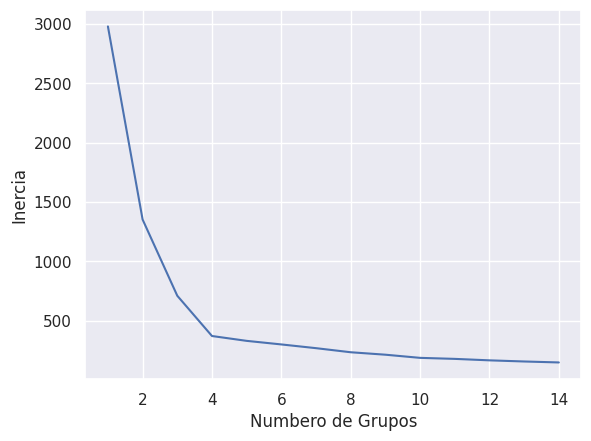

In [11]:
inercias = []

for i in range(1, 15):
  k_medias = KMeans(n_clusters=i, random_state=0)
  k_medias.fit(puntos)
  inercias.append(k_medias.inertia_)

plt.plot(range(1, 15), inercias)
plt.xlabel('Numbero de Grupos')
plt.ylabel('Inercia');

Ya que el metodo visual no es muy mecanico, podemos encontrar la posicion del mejor valor en el codo mediante la doble derivacion:

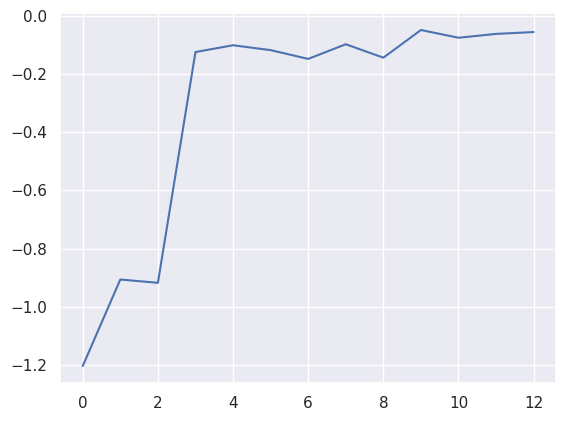

In [12]:
pct_difs = np.diff(inercias)/np.array(inercias[1:])
pct_difs
plt.plot(range(len(pct_difs)), pct_difs);

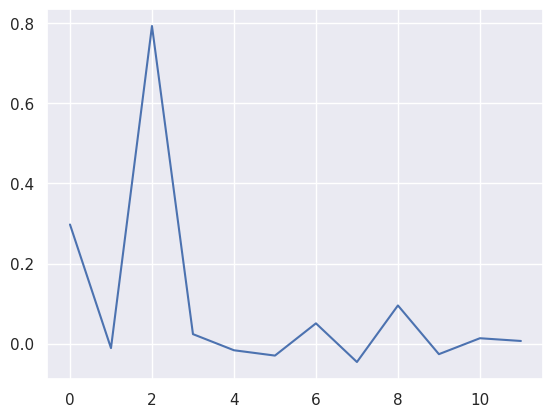

In [13]:
pct_dif_dif = np.diff(pct_difs)
pct_dif_dif
plt.plot(range(len(pct_dif_dif)), pct_dif_dif);

In [14]:
# El indice del mejor codo es el indice maximo de la segunda derivada mas 1
# por cada derivacion ya que cada vez que derivamos eliminamos el primer indice.
mejor_codo = np.argmax(pct_dif_dif)+2
mejor_codo

4

# Segmentacion de clientes

Datos adaptados de:
https://github.com/jeffprosise/Machine-Learning/blob/master/Data/customers.csv

Este tipo de tecnicas se pueden utilizar para segmentar, por ejemplo, los clientes de una empresa para poder ofrecerles el mejor servicio personalizado posible:

In [19]:
import pandas as pd

# URL del archivo en GitHub
archivo_clientes = 'https://raw.githubusercontent.com/jeffprosise/Machine-Learning/master/Data/customers.csv'

# Cargar los datos en un DataFrame de pandas
clientes = pd.read_csv(archivo_clientes, index_col='CustomerID')  # Usar "CustomerID" como índice

# Mostrar las primeras filas para verificar el formato
clientes.columns = ['Genero', 'Edad', 'Salario', 'Clasificacion_gasto']  # Renombrar columnas
clientes.head()


,Genero,Edad,Salario,Clasificacion_gasto
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


Salario y Clasificacion de Gasto nos pueden indicar que clientes podrian estar interesados en aumentar su nivel de compras:

In [20]:
puntos = clientes[ ['Salario','Clasificacion_gasto'] ].values
print(puntos)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

Otra manera de hacer el vector.

In [21]:
x = clientes[['Salario']].values.squeeze()
y = clientes[['Clasificacion_gasto']].values.squeeze()
print(x)
print(y)

[ 15  15  16  16  17  17  18  18  19  19  19  19  20  20  20  20  21  21
  23  23  24  24  25  25  28  28  28  28  29  29  30  30  33  33  33  33
  34  34  37  37  38  38  39  39  39  39  40  40  40  40  42  42  43  43
  43  43  44  44  46  46  46  46  47  47  48  48  48  48  48  48  49  49
  50  50  54  54  54  54  54  54  54  54  54  54  54  54  57  57  58  58
  59  59  60  60  60  60  60  60  61  61  62  62  62  62  62  62  63  63
  63  63  63  63  64  64  65  65  65  65  67  67  67  67  69  69  70  70
  71  71  71  71  71  71  72  72  73  73  73  73  74  74  75  75  76  76
  77  77  77  77  78  78  78  78  78  78  78  78  78  78  78  78  79  79
  81  81  85  85  86  86  87  87  87  87  87  87  88  88  88  88  93  93
  97  97  98  98  99  99 101 101 103 103 103 103 113 113 120 120 126 126
 137 137]
[39 81  6 77 40 76  6 94  3 72 14 99 15 77 13 79 35 66 29 98 35 73  5 73
 14 82 32 61 31 87  4 73  4 92 14 81 17 73 26 75 35 92 36 61 28 65 55 47
 42 42 52 60 54 60 45 41 50 46 51 46 56 5

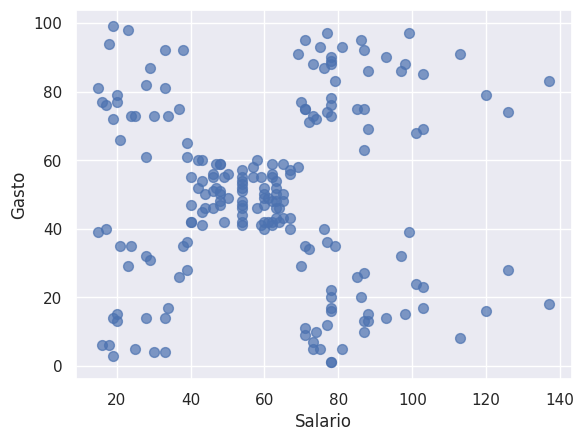

In [22]:
x = puntos[:, 0]
y = puntos[:, 1]

plt.scatter(x, y, s=50, alpha=0.7)
plt.xlabel('Salario')
plt.ylabel('Gasto');

¿En cuantos grupos podemos agruparlos? Visualmente parece que 5 grupos nos dan el menor numero de grupos que maximiza las diferencias entre los clientes de cada grupo.

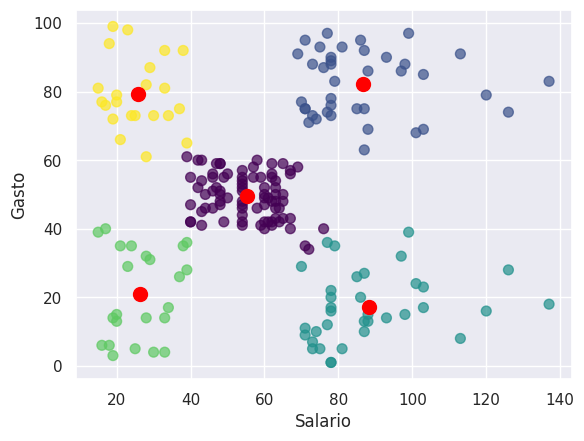

In [23]:
k_medias = KMeans(n_clusters=5, random_state=0)
k_medias.fit(puntos)
idx_prediccion = k_medias.predict(puntos)

plt.scatter(x, y, c=idx_prediccion, s=50, alpha=0.7, cmap='viridis')
plt.xlabel('Salario')
plt.ylabel('Gasto')

centroides = k_medias.cluster_centers_
plt.scatter(centroides[:, 0], centroides[:, 1], c='red', s=100);

Hemos elegido 5 grupos por inspeccion visual del grafico. ¿Podrias demostrar que esta eleccion es correcta?

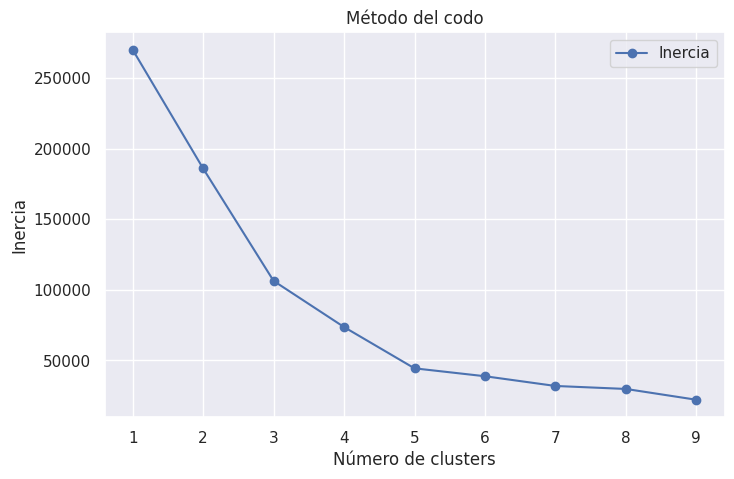

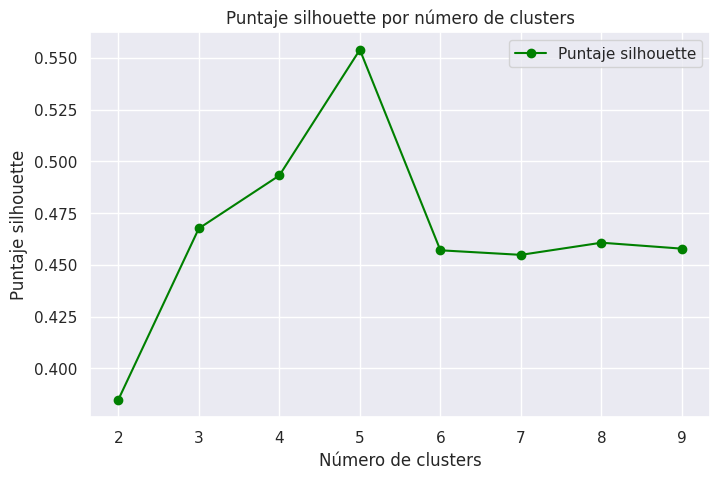

Puntaje silhouette para 5 clusters: 0.553931997444648


In [24]:
from sklearn.cluster import KMeans  # Importar K-Means para clustering
from sklearn.metrics import silhouette_score  # Importar el puntaje silhouette para evaluar la calidad de los clusters
import matplotlib.pyplot as plt  # Importar matplotlib para graficar

# 1. Método del codo
inercias = []  # Lista para almacenar las inercias
k_values = range(1, 10)  # Probar diferentes números de clusters, de 1 a 9

for k in k_values:
    # Crear el modelo K-Means con k clusters
    k_medias = KMeans(n_clusters=k, random_state=0)

    # Ajustar el modelo a los datos
    k_medias.fit(puntos)

    # Guardar la inercia (suma de distancias al cuadrado de los puntos a sus centroides)
    inercias.append(k_medias.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8, 5))  # Configurar el tamaño del gráfico
plt.plot(k_values, inercias, marker='o', label='Inercia')  # Graficar el número de clusters vs inercia
plt.xlabel('Número de clusters')  # Etiqueta del eje X
plt.ylabel('Inercia')  # Etiqueta del eje Y
plt.title('Método del codo')  # Título del gráfico
plt.grid(True)  # Mostrar cuadrícula
plt.legend()  # Mostrar la leyenda
plt.show()  # Mostrar el gráfico

# 2. Puntaje silhouette
silhouette_scores = []  # Lista para almacenar los puntajes silhouette

# Probar con diferentes números de clusters (de 2 a 9, ya que silhouette no tiene sentido para 1 cluster)
for k in range(2, 10):
    # Crear el modelo K-Means con k clusters
    k_medias = KMeans(n_clusters=k, random_state=0)

    # Ajustar el modelo a los datos
    k_medias.fit(puntos)

    # Calcular el puntaje silhouette (cohesión dentro de los clusters y separación entre ellos)
    score = silhouette_score(puntos, k_medias.labels_)

    # Guardar el puntaje silhouette
    silhouette_scores.append(score)

# Graficar los puntajes silhouette
plt.figure(figsize=(8, 5))  # Configurar el tamaño del gráfico
plt.plot(range(2, 10), silhouette_scores, marker='o', color='green', label='Puntaje silhouette')  # Graficar
plt.xlabel('Número de clusters')  # Etiqueta del eje X
plt.ylabel('Puntaje silhouette')  # Etiqueta del eje Y
plt.title('Puntaje silhouette por número de clusters')  # Título del gráfico
plt.grid(True)  # Mostrar cuadrícula
plt.legend()  # Mostrar la leyenda
plt.show()  # Mostrar el gráfico

# 3. Puntaje silhouette para 5 clusters
# Crear el modelo K-Means con 5 clusters
k_medias = KMeans(n_clusters=5, random_state=0)

# Ajustar el modelo a los datos
k_medias.fit(puntos)

# Calcular el puntaje silhouette para el modelo con 5 clusters
puntaje_silhouette = silhouette_score(puntos, k_medias.labels_)

# Imprimir el puntaje silhouette
print(f"Puntaje silhouette para 5 clusters: {puntaje_silhouette}")

¿Cuales son los clientes con mayor salario y menor gasto? Podemos predecir en que grupo apareceria un cliente que tenga un salario de 120 y un gasto de 20:

In [26]:
# Predicción del cluster para un cliente con salario de 120 y gasto de 20
nuevo_cliente = np.array([[120, 20]])
cluster_nuevo_cliente = k_medias.predict(nuevo_cliente)[0]
print(f"El cliente con salario 120 y gasto 20 pertenece al cluster: {cluster_nuevo_cliente}")

# Mostrar el cluster con los clientes de mayor salario y menor gasto
centroides = k_medias.cluster_centers_  # Obtener los centroides de los clusters
cluster_menor_gasto = np.argmin(centroides[:, 1])  # Encontrar el cluster con menor gasto (segunda columna)
cluster_mayor_salario = np.argmax(centroides[:, 0])  # Encontrar el cluster con mayor salario (primera columna)

print(f"Cluster con menor gasto: {cluster_menor_gasto}")
print(f"Cluster con mayor salario: {cluster_mayor_salario}")

El cliente con salario 120 y gasto 20 pertenece al cluster: 2
Cluster con menor gasto: 2
Cluster con mayor salario: 2


Los clientes de este grupo de interes se pueden extraer de la serie de datos completa:

In [27]:
# Grupo de poco gastadores con altos ingresos:
clientes['Grupo'] = k_medias.predict(clientes[['Salario','Clasificacion_gasto']].values)
# Filtrado solo para estos clientes:
clientes[ clientes['Grupo'] == objetivo]

,Genero,Edad,Salario,Clasificacion_gasto,Grupo
CustomerID,,,,,
44,Female,31,39,61,0
47,Female,50,40,55,0
48,Female,27,40,47,0
49,Female,29,40,42,0
50,Female,31,40,42,0
...,...,...,...,...,...
122,Female,38,67,40,0
123,Female,40,69,58,0
127,Male,43,71,35,0


In [28]:
clientes.tail()

,Genero,Edad,Salario,Clasificacion_gasto,Grupo
CustomerID,,,,,
196,Female,35,120,79,1
197,Female,45,126,28,2
198,Male,32,126,74,1
199,Male,32,137,18,2
200,Male,30,137,83,1


Orientando nuestros esfuerzos de marketing y ventas hacia estos clientes quizas maximicemos nuestra eficacia. Otro modelo podria entonces clasificar los clientes por susceptibilidad a nuestras ofertas.

# Clasificacion Multivariable

La clasificacion no esta limitada a dos variables (bivariable), sino que puede ser multivariable. Para ello, debemos primero modificar el formato de nuestros datos para hacer todas las variables comprensibles por la maquina:

In [29]:
from sklearn.preprocessing import LabelEncoder

df = clientes.copy()
codificador = LabelEncoder()
df['Genero'] = codificador.fit_transform(df['Genero'])
df.head()

,Genero,Edad,Salario,Clasificacion_gasto,Grupo
CustomerID,,,,,
1,1,19,15,39,3
2,1,21,15,81,4
3,0,20,16,6,3
4,0,23,16,77,4
5,0,31,17,40,3


Generando codificadores de etiquetas:

In [30]:
codificador_frutas = LabelEncoder()
frutas = ['Piña', 'Platano', 'Manzana', 'Pera']

In [31]:
codificador_frutas.fit(frutas);

In [32]:
codificador_frutas.transform(['Piña'])

array([2])

In [33]:
frutas_larga = ['Piña','Pera', 'Platano', 'Manzana', 'Pera', 'Manzana', 'Manzana', 'Pera']

In [34]:
codificador_frutas.transform(frutas_larga)

array([2, 1, 3, 0, 1, 0, 0, 1])

In [35]:
codificador_frutas.inverse_transform([2])

array(['Piña'], dtype='<U7')

In [36]:
codificador_frutas.classes_

array(['Manzana', 'Pera', 'Piña', 'Platano'], dtype='<U7')

Usaremos 3 variables inicialmente, es el limite de variables que podemos representar facilmente en el espacio tridimensional:

In [37]:
puntos = df[['Edad', 'Salario', 'Clasificacion_gasto']].values

In [38]:
k_medias = KMeans(n_clusters=5, random_state=0)
k_medias.fit(puntos)
df['Grupo'] = k_medias.predict(puntos)
df.Grupo

,Grupo
CustomerID,
1,2
2,2
3,0
4,2
5,0
...,...
196,1
197,3
198,1


Generamos una visualizacion tridimensional:

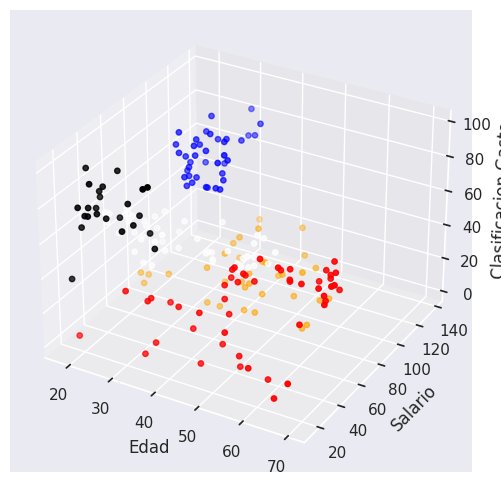

In [39]:
from mpl_toolkits.mplot3d import Axes3D

colors = ['red', 'blue', 'black', 'orange', 'white']

df['color'] = df.Grupo.map({0:colors[0], 1:colors[1], 2:colors[2],
                        3:colors[3], 4:colors[4]})

fig = plt.figure(figsize=(26,6))

ax = fig.add_subplot(132, projection='3d')
ax.scatter(df.Edad, df.Salario, df.Clasificacion_gasto, c=df.color, s=15)
ax.set_xlabel('Edad')
ax.set_ylabel('Salario')
ax.set_zlabel('Clasificacion Gasto')
plt.show()

¿Como son estos grupos? Inspeccionando sus valores medios ganamos algo mas de informacion:

In [40]:
resultados = pd.DataFrame(columns = ['Grupo',
                                     'Edad',
                                     'Ingresos Medios',
                                     'Gasto Medio'])

for i in range(len(k_medias.cluster_centers_)):
    edad = df[df['Grupo'] == i]['Edad'].mean()
    ingresos = df[df['Grupo'] == i]['Salario'].mean()
    gasto = df[df['Grupo'] == i]['Clasificacion_gasto'].mean()

    gdf = df[df['Grupo'] == i]

    resultados.loc[i] = ([i, edad, ingresos, gasto])

resultados.head()

,Grupo,Edad,Ingresos Medios,Gasto Medio
0,0.0,54.060000,40.460000,36.720000
1,1.0,32.692308,86.538462,82.128205
2,2.0,25.250000,25.833333,76.916667
3,3.0,41.647059,88.735294,16.764706
4,4.0,33.396226,58.056604,48.773585


In [41]:
k_medias.predict(np.array([[50, 20, 20]]))[0]

0

# Actividad:

Utilizando el archivo de datos sobre propiedas en EEUU (https://www.kaggle.com/datasets/vedavyasv/usa-housing), ¿Que tipo de grupos puedes generar mediante aprendizaje no supervisado?¿Que aplicaciones o utilidades podriamos extraer de estos datos?

Los datos son los siguientes:

'Avg. Area Income': Ingresos medios de los residentes en la localizacion.

'Avg. Area House Age': Antiguedad media de las casas en la ciudad.

'Avg. Area Number of Rooms': Media de habitaciones por casa en la zona.

'Avg. Area Number of Bedrooms': Media de dormitorios por casa en la zona.

'Area Population': Poblacion de la zona en la que se localiza la casa.

'Price': Precio de la casa.

'Address': Direccion postal de la casa.


In [46]:
import pandas as pd

# Configurar pandas para que muestre todas las columnas sin truncar
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas
pd.set_option('display.width', 1000)       # Ampliar el ancho del DataFrame
pd.set_option('display.max_colwidth', 50)  # Ajustar el ancho de las celdas

# URL directa del archivo en GitHub
archivo_clientes = 'https://raw.githubusercontent.com/cddogaru/Inteligencia-Artificial---Aprendizaje-No-Supervisado/main/USA_Housing.csv'

# Cargar los datos
clientes = pd.read_csv(archivo_clientes)

# Mostrar las primeras filas del DataFrame
print(clientes.head())

# Ver información general sobre las columnas y tipos de datos
print(clientes.info())

# Resumen estadístico de los datos numéricos
print(clientes.describe())


   Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  Avg. Area Number of Bedrooms  Area Population         Price                                            Address
0      79545.458574             5.682861                   7.009188                          4.09     23086.800503  1.059034e+06  208 Michael Ferry Apt. 674\nLaurabury, NE 3701...
1      79248.642455             6.002900                   6.730821                          3.09     40173.072174  1.505891e+06  188 Johnson Views Suite 079\nLake Kathleen, CA...
2      61287.067179             5.865890                   8.512727                          5.13     36882.159400  1.058988e+06  9127 Elizabeth Stravenue\nDanieltown, WI 06482...
3      63345.240046             7.188236                   5.586729                          3.26     34310.242831  1.260617e+06                          USS Barnett\nFPO AP 44820
4      59982.197226             5.040555                   7.839388                          4.23   

Primeras filas del DataFrame:
   Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  Avg. Area Number of Bedrooms  Area Population         Price                                            Address
0      79545.458574             5.682861                   7.009188                          4.09     23086.800503  1.059034e+06  208 Michael Ferry Apt. 674\nLaurabury, NE 3701...
1      79248.642455             6.002900                   6.730821                          3.09     40173.072174  1.505891e+06  188 Johnson Views Suite 079\nLake Kathleen, CA...
2      61287.067179             5.865890                   8.512727                          5.13     36882.159400  1.058988e+06  9127 Elizabeth Stravenue\nDanieltown, WI 06482...
3      63345.240046             7.188236                   5.586729                          3.26     34310.242831  1.260617e+06                          USS Barnett\nFPO AP 44820
4      59982.197226             5.040555                   7.839388   

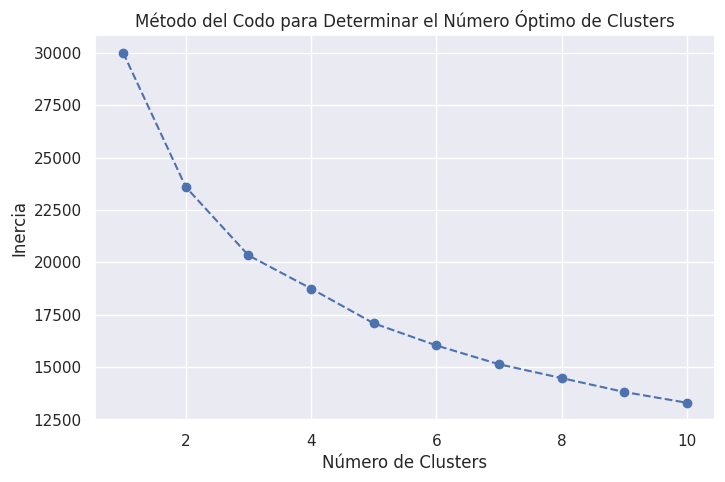


Primeras filas del DataFrame con los grupos asignados:
   Grupo  Avg. Area Income         Price
0      3      79545.458574  1.059034e+06
1      2      79248.642455  1.505891e+06
2      0      61287.067179  1.058988e+06
3      3      63345.240046  1.260617e+06
4      1      59982.197226  6.309435e+05

Características promedio de cada grupo:
       Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  Avg. Area Number of Bedrooms  Area Population         Price
Grupo                                                                                                                               
0          71464.659973             6.108349                   7.932083                      5.353590     35241.328581  1.425960e+06
1          56596.862798             5.431612                   7.049117                      3.986086     36310.865312  8.781472e+05
2          74126.646978             6.551244                   6.799541                      3.423452     43186.629787  1.544

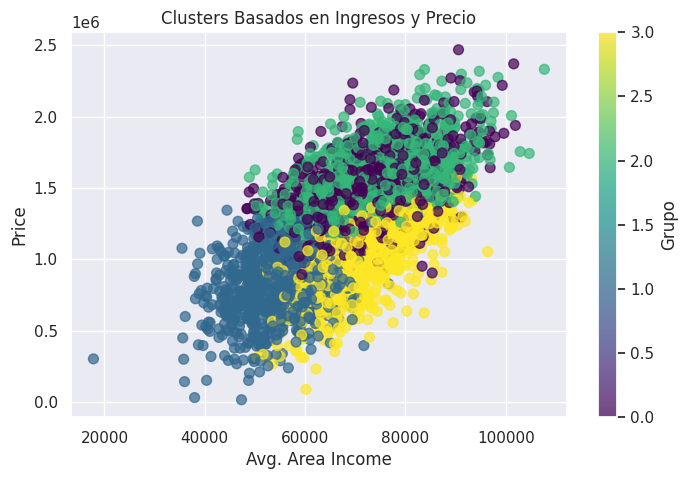

In [48]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Configurar pandas para mostrar todas las columnas sin truncar
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas
pd.set_option('display.width', 1000)       # Ampliar el ancho del DataFrame
pd.set_option('display.max_colwidth', 50)  # Ajustar el ancho de las celdas

# URL directa del archivo en GitHub
archivo_clientes = 'https://raw.githubusercontent.com/cddogaru/Inteligencia-Artificial---Aprendizaje-No-Supervisado/main/USA_Housing.csv'

# Cargar los datos
clientes = pd.read_csv(archivo_clientes)

# Mostrar las primeras filas del DataFrame
print("Primeras filas del DataFrame:")
print(clientes.head())

# Explorar los datos: información general y estadísticas descriptivas
print("\nInformación general sobre las columnas:")
print(clientes.info())

print("\nResumen estadístico de las columnas numéricas:")
print(clientes.describe())

# Seleccionar las columnas numéricas para preprocesar
columnas_numericas = ['Avg. Area Income', 'Avg. Area House Age',
                      'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms',
                      'Area Population', 'Price']

# Escalar los datos para normalizar las variables
scaler = StandardScaler()
datos_escalados = scaler.fit_transform(clientes[columnas_numericas])

# Crear un DataFrame con los datos escalados
clientes_escalados = pd.DataFrame(datos_escalados, columns=columnas_numericas)
print("\nPrimeras filas de los datos escalados:")
print(clientes_escalados.head())

# Aplicar el método del codo para determinar el número óptimo de clusters
inercias = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(datos_escalados)
    inercias.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inercias, marker='o', linestyle='--')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.title('Método del Codo para Determinar el Número Óptimo de Clusters')
plt.show()

# Aplicar K-Means con el número óptimo de clusters (ajusta según el método del codo)
n_clusters = 4  # Ajusta este valor según el gráfico del método del codo
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
clientes['Grupo'] = kmeans.fit_predict(datos_escalados)

# Mostrar los resultados con los grupos asignados
print("\nPrimeras filas del DataFrame con los grupos asignados:")
print(clientes[['Grupo', 'Avg. Area Income', 'Price']].head())

# Analizar las características de cada grupo
columnas_analisis = ['Avg. Area Income', 'Avg. Area House Age',
                     'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms',
                     'Area Population', 'Price']  # Excluir columnas no numéricas

resultados = clientes.groupby('Grupo')[columnas_analisis].mean()
print("\nCaracterísticas promedio de cada grupo:")
print(resultados)

# Visualizar los clusters (si es relevante en 2D usando dos variables)
plt.figure(figsize=(8, 5))
plt.scatter(clientes['Avg. Area Income'], clientes['Price'], c=clientes['Grupo'], cmap='viridis', alpha=0.7, s=50)
plt.colorbar(label='Grupo')
plt.xlabel('Avg. Area Income')
plt.ylabel('Price')
plt.title('Clusters Basados en Ingresos y Precio')
plt.show()
